<a href="https://colab.research.google.com/github/hgf777-br/trabalho-final-deep-learning/blob/master/MNIST_com_Salvamento_no_GDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Carregando Bibliotecas

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.utils.np_utils import  to_categorical
from keras.models import Sequential,load_model
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist

from sklearn.model_selection import train_test_split

In [41]:
# Funções Auxiliares
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Carregando os dataset treinamento / teste

In [43]:
(xorig_train, yorig_train), (x_test, y_test) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


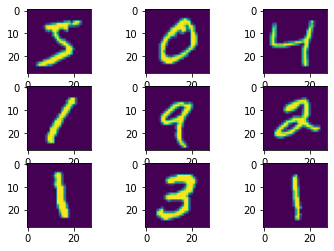

In [44]:
print('Train: X=%s, y=%s' % (xorig_train.shape, yorig_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(xorig_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [45]:
xorig_train = xorig_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [46]:
xorig_train = xorig_train.reshape(xorig_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


### 4.  Dividindo o dataset em treinamento, teste e validação

In [47]:
num_classes = len(np.unique(yorig_train))
(x_train,x_valid) = xorig_train[3000:], xorig_train[:3000]
(y_train,y_valid) = yorig_train[3000:], yorig_train[:3000] 

In [48]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [49]:
num_classes

10

Impressão da forma do conjunto de treino

In [50]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)


x_train shape: (57000, 28, 28, 1)
y_train shape: (57000, 10)


In [51]:
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

x_valid shape: (3000, 28, 28, 1)
y_valid shape: (3000, 10)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [52]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


57000 train samples
10000 test samples
3000 validation samples


## 5. arquitetura do modelo






In [53]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())                      
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

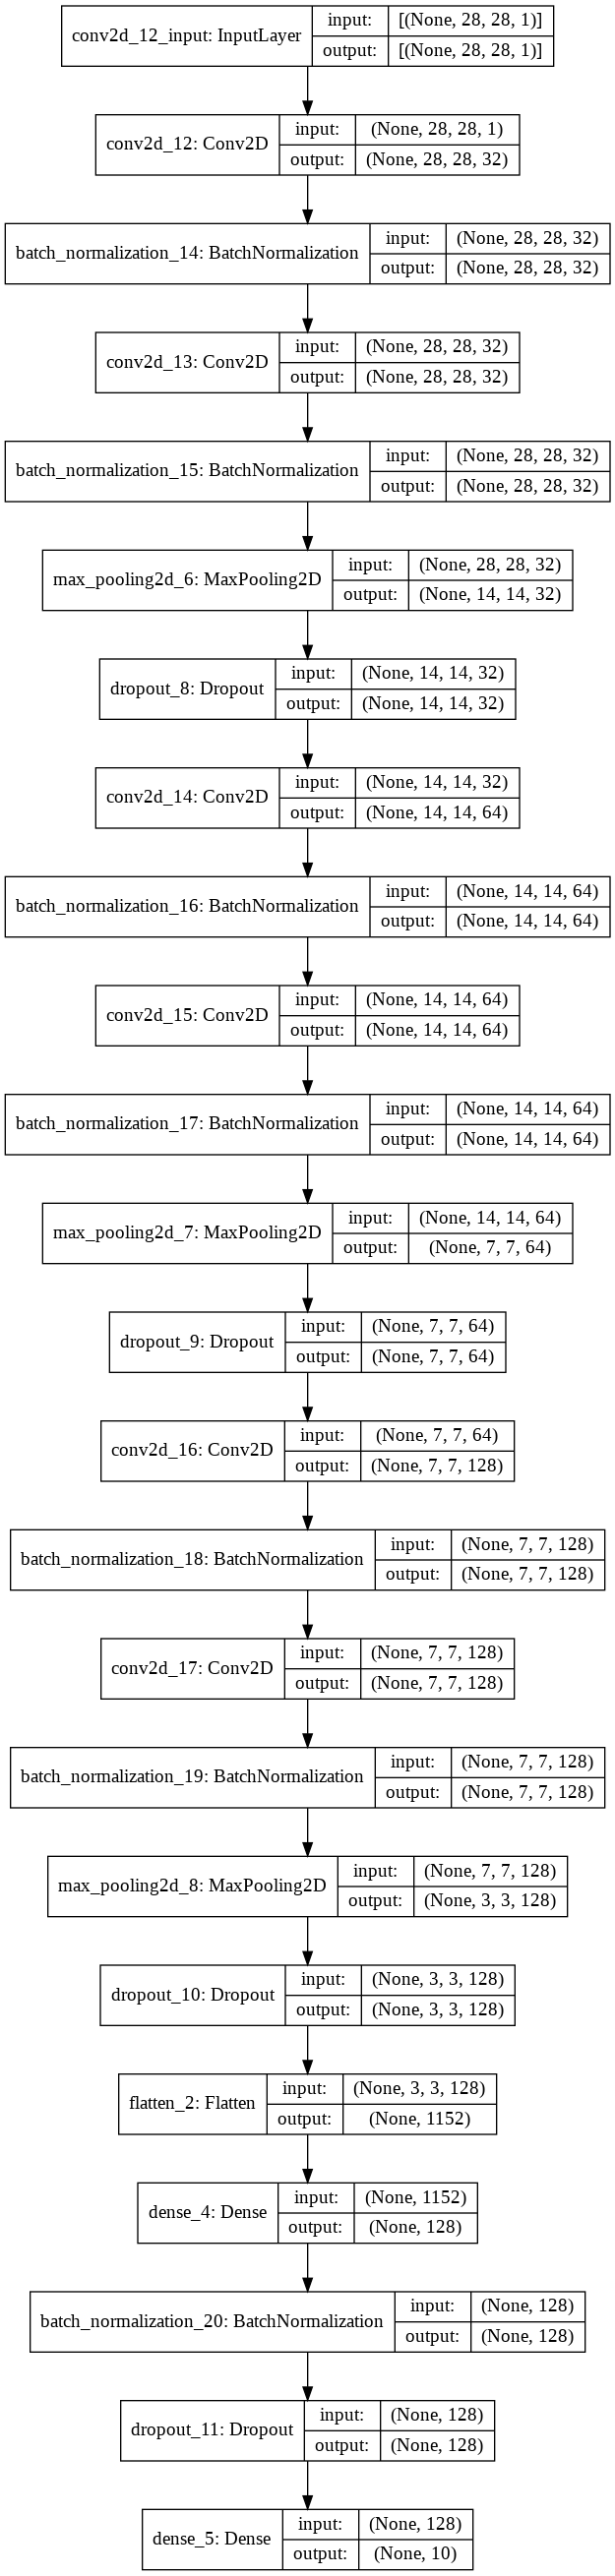

In [54]:
plot_model(model, to_file='vgg-mnist.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                  

### 7. Treinando o modelo

In [56]:
from keras.callbacks import ModelCheckpoint   

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [57]:
checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/checkpoints/modelo_mnist.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
                              
hist = model.fit(x_train, y_train, batch_size=180, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
317/317 [==============================] - 9s 21ms/step - loss: 0.7468 - accuracy: 0.7753 - val_loss: 6.9087 - val_accuracy: 0.1130

Epoch 00001: val_accuracy improved from -inf to 0.11300, saving model to /content/drive/My Drive/checkpoints/modelo_mnist.hdf5
Epoch 2/20
317/317 [==============================] - 6s 19ms/step - loss: 0.0841 - accuracy: 0.9745 - val_loss: 0.0677 - val_accuracy: 0.9837

Epoch 00002: val_accuracy improved from 0.11300 to 0.98367, saving model to /content/drive/My Drive/checkpoints/modelo_mnist.hdf5
Epoch 3/20
317/317 [==============================] - 6s 19ms/step - loss: 0.0548 - accuracy: 0.9832 - val_loss: 0.0332 - val_accuracy: 0.9910

Epoch 00003: val_accuracy improved from 0.98367 to 0.99100, saving model to /content/drive/My Drive/checkpoints/modelo_mnist.hdf5
Epoch 4/20
317/317 [==============================] - 6s 19ms/step - loss: 0.0449 - accuracy: 0.9865 - val_loss: 0.0386 - val_accuracy: 0.9883

Epoch 00004: val_accuracy did not imp

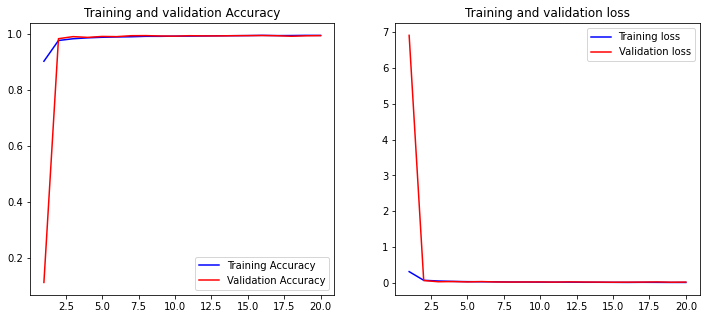

In [58]:
plot_history(hist)

In [59]:
#plt.figure(1)
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
#plt.show()

#plt.figure(1)
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['loss', 'validation loss'])
#plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [60]:
model = load_model("/content/drive/My Drive/checkpoints/modelo_mnist.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [61]:
y_test = to_categorical(y_test)

In [62]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9944999814033508


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [63]:
y_hat = model.predict(x_test)

In [64]:
y_hat[100,:]

array([3.8826124e-06, 3.9798684e-09, 1.2741599e-09, 8.7417478e-09,
       3.6864414e-08, 2.2766915e-06, 9.9999344e-01, 9.3889341e-11,
       3.0191924e-07, 8.7808977e-10], dtype=float32)

In [65]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [66]:
y_hat_classes[100]

6

Definindo rótulos de texto

In [67]:
mnist_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

Plot de amostra aleatória de imagens de teste, rótulos preditos

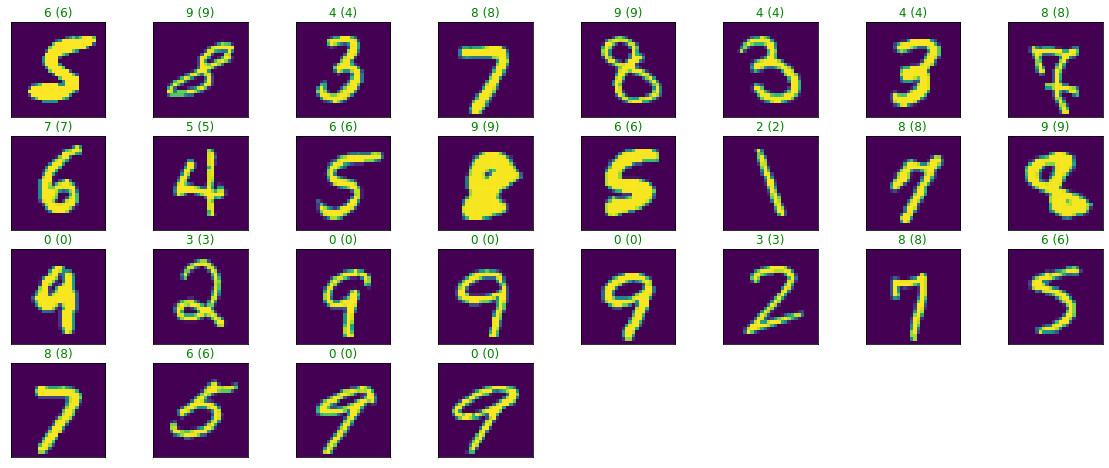

In [68]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=28, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
